<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/16.%20Decision_Tree_13_03_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split # to partition data into training and testing
from sklearn.tree import  DecisionTreeClassifier # to build the classification model
from sklearn.tree import DecisionTreeRegressor   # to build the regression model
from sklearn import tree #Build the decision tree
from sklearn.metrics import classification_report # gives the report with accurarcy, F1 score, etc
from sklearn import preprocessing

In [2]:
#upload the dataset - iris (1)

In [3]:
#read the dataset
iris = pd.read_csv('iris (1).csv')

In [4]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# target variable is Species. As it is a classification we need to transform it using dummyfication using label encoder
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species'])

In [6]:
#Dividing the data into independant variables and target variable
x=iris.iloc[:,0:4]
y=iris['Species']

In [7]:
# pd.set_option("display.max_rows", None) # used to display all the rows data

In [8]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [10]:
iris['Species'].unique()

array([0, 1, 2])

In [11]:
iris.Species.value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [12]:
colnames = list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [13]:
# Splitting data into training and testing data set
# When we say test size = 0.2, it means 80% will be training dataset and 20% will be testing dataset
# Random state is like memory. It is going to preserve the training dataset and the testing dataset.
# It acts as a lock so that whenever we run the model we get the same accurarcy
# If we dont lock it, then it will assume different datasets everytime you run the model
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# **Decision Tree Model**

### Building Decision Tree Classifier using Entropy Criteria

In [14]:
# We are building the decision tree model using the criterion of entropy and the depth of the tree being 3
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) # fitting the model onto the training dataset

DecisionTreeClassifier(criterion='entropy', max_depth=3)

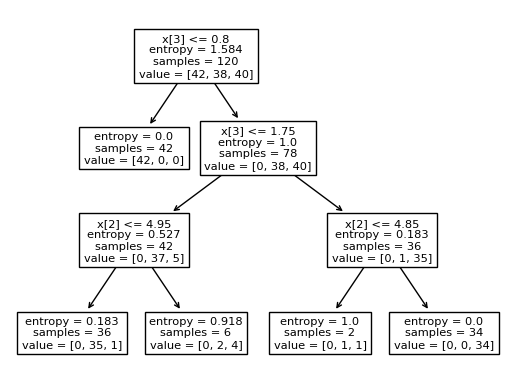

In [15]:
#PLot or building the decision tree
tree.plot_tree(model);

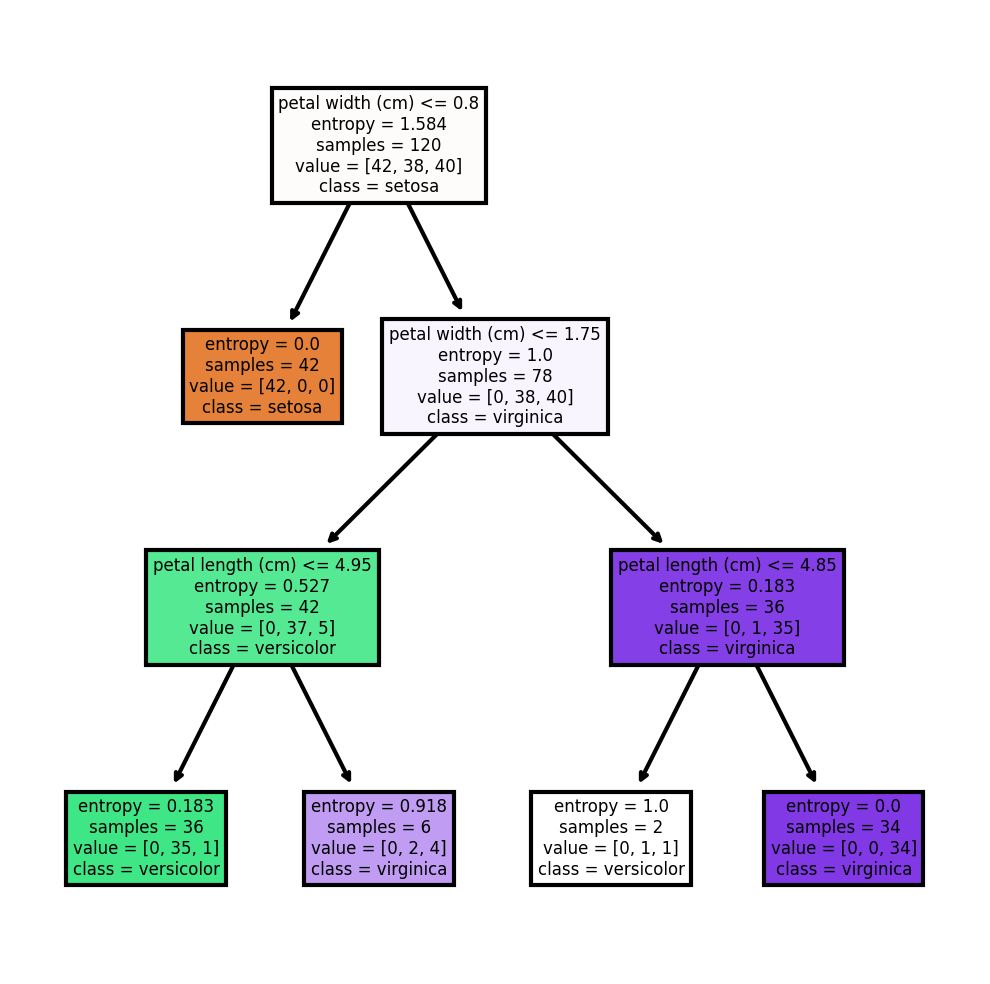

In [16]:
# Understanding the decision tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [17]:
# We have used entropy concept to build the decision tree
# The root node is petal length and the best split point is <= 2.45 (root node)
# entropy value for 2 classes is 1. But here there are 3 classes, therefore entropy is log(3) base 2. which is around 1.5
# No. of samples is 120 (and not 150) because 80% of the dataframe is used as training dataset
# After splitting the dataset, we get 1 pure cluster of setosa and another cluster with 78 samples. (2nd Branch)
# We further divide the cluster using petal width and the best-split point being <= 1.75
# We get 2 clusters that are not completely homogeneous.
# So we divide each cluster once again using petal length and their respective best split point (3rd Branch)
# We get relatively homogenous clusters. We stop branching at this point as we had mentioned only 3 branches in the above code

In [18]:
# The above decision tree is represented in text format
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [19]:
# It gives us the most important features - petal length and petal width
model.feature_importances_

array([0.        , 0.        , 0.08302486, 0.91697514])

In [20]:
# The degree of importance of the feature sorted in descending order
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

petal width (cm)     0.916975
petal length (cm)    0.083025
sepal length (cm)    0.000000
sepal width (cm)     0.000000
dtype: float64

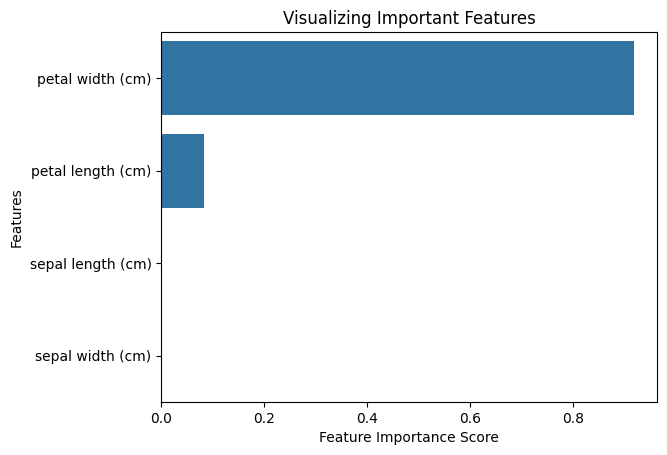

In [21]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [22]:
# Using the model that we have built, Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    13
2     9
0     8
Name: count, dtype: int64

In [23]:
# Displaying the values
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [24]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [25]:
# Accuracy
np.mean(preds==y_test)

0.9666666666666667

### Building Decision Tree Classifier (CART) using Gini Criteria

In [26]:
# Creating a model using cart
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
# Fitting the training dataset onto the model
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
#Prediction it on testing dataset and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

In [29]:
model.feature_importances_

array([0.        , 0.        , 0.08302486, 0.91697514])

#### Decision Tree Regression Example

In [30]:
# Building a Decision Tree Regression model  using CART
# Diving the x and y, where x = Sepal length, sepal width & petal length and y = petal width
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [31]:
# Diving the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
# Bilding the model
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [35]:
#Find the testing accuracy
model.score(X_test,y_test)

0.9329760514940059

In [36]:
#Find the training accuracy
model.score(X_train, y_train)

0.9431340464432032

In [37]:
# As both training and testing accurarcies are high we have built a generic model
# If the Training accurarcy was high and the testing accurarcy was low then it would have been a overfit model
# If the training and testing accurarcies were low, then it would have been underfit model